In [14]:
import os
import glob

import pandas as pd
import cv2

from tqdm.auto import tqdm

/opt/homebrew/Caskroom/miniconda/base/envs/synthesis-car-od/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
working_dir = 'synthesis-car-od'
dir_len = len(working_dir)

path = os.getcwd().replace('\\', '/')
index = path.find(working_dir)
working_dir = path[:index + dir_len + 1]
working_dir

'/Users/a16/Desktop/JJ/self_study/projects/synthesis-car-od/'

In [16]:
DATA_PATH = os.path.join(working_dir, 'data/')
TRAIN_PATH = os.path.join(DATA_PATH, 'train/')

## Train 데이터 이미지 크기

- Train 데이터 전체 1040, 1920으로 동일

In [33]:
imgs = sorted(glob.glob(os.path.join(TRAIN_PATH, '*.png')))
imgs[:5]

['/Users/a16/Desktop/JJ/self_study/projects/synthesis-car-od/data/train/syn_00000.png',
 '/Users/a16/Desktop/JJ/self_study/projects/synthesis-car-od/data/train/syn_00001.png',
 '/Users/a16/Desktop/JJ/self_study/projects/synthesis-car-od/data/train/syn_00002.png',
 '/Users/a16/Desktop/JJ/self_study/projects/synthesis-car-od/data/train/syn_00003.png',
 '/Users/a16/Desktop/JJ/self_study/projects/synthesis-car-od/data/train/syn_00004.png']

In [18]:
width = []
height = []

for img in tqdm(imgs):
    img = cv2.imread(img)
    w, h, _ = img.shape
    width.append(w)
    height.append(h)

100%|██████████| 6481/6481 [05:10<00:00, 20.88it/s]


In [19]:
files = list(map(lambda x : x.replace('\\', '/').split('/')[-1], imgs))
files[:5]

['syn_00710.png',
 'syn_06361.png',
 'syn_02107.png',
 'syn_05668.png',
 'syn_04576.png']

In [20]:
df = pd.DataFrame({
    'name' : files,
    'width' : width,
    'height' : height,
})
df.head()

,name,width,height
0,syn_00710.png,1040,1920
1,syn_06361.png,1040,1920
2,syn_02107.png,1040,1920
3,syn_05668.png,1040,1920
4,syn_04576.png,1040,1920


In [24]:
display(df['width'].value_counts())
display(df['height'].value_counts())

width
1040    6481
Name: count, dtype: int64

height
1920    6481
Name: count, dtype: int64

## 클래스별 개수 확인

- 34개 클래스 각각 500개로 개수 동일

In [34]:
txts = sorted(glob.glob(os.path.join(TRAIN_PATH, '*.txt')))
txts[:5]

['/Users/a16/Desktop/JJ/self_study/projects/synthesis-car-od/data/train/syn_00000.txt',
 '/Users/a16/Desktop/JJ/self_study/projects/synthesis-car-od/data/train/syn_00001.txt',
 '/Users/a16/Desktop/JJ/self_study/projects/synthesis-car-od/data/train/syn_00002.txt',
 '/Users/a16/Desktop/JJ/self_study/projects/synthesis-car-od/data/train/syn_00003.txt',
 '/Users/a16/Desktop/JJ/self_study/projects/synthesis-car-od/data/train/syn_00004.txt']

In [35]:
names = []
labels = []

for img, txt in zip(imgs, txts):
    img_name = img.replace('\\', '/').split('/')[-1]

    with open(txt, 'r') as t:
        lines = t.readlines()

        for line in lines:
            line = line.strip()
            label = int(float(line.split(' ')[0]))

            names.append(img_name)
            labels.append(label)

print(names[:5])
print(labels[:5])

['syn_00000.png', 'syn_00000.png', 'syn_00000.png', 'syn_00001.png', 'syn_00001.png']
[9, 25, 12, 16, 14]


In [36]:
label_df = pd.DataFrame({
    'name' : names,
    'label' : labels
})
label_df.head()

,name,label
0,syn_00000.png,9
1,syn_00000.png,25
2,syn_00000.png,12
3,syn_00001.png,16
4,syn_00001.png,14


In [42]:
label_df['label'].value_counts().sort_index()

label
0     500
1     500
2     500
3     500
4     500
5     500
6     500
7     500
8     500
9     500
10    500
11    500
12    500
13    500
14    500
15    500
16    500
17    500
18    500
19    500
20    500
21    500
22    500
23    500
24    500
25    500
26    500
27    500
28    500
29    500
30    500
31    500
32    500
33    500
Name: count, dtype: int64

<Axes: xlabel='label'>

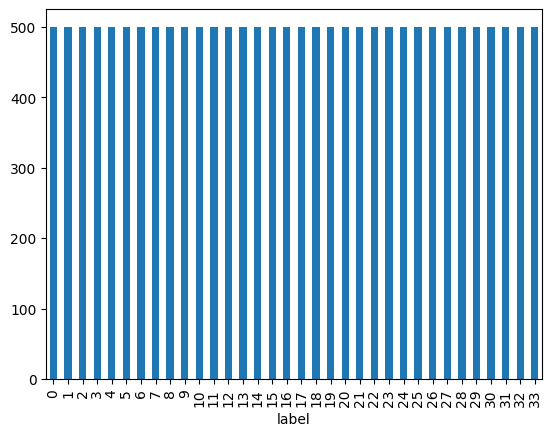

In [43]:
label_df['label'].value_counts().sort_index().plot(kind='bar')